# PI Estimation

In [1]:
import pandas as pd
import random 
import math
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [95]:
r = 1
N = 1001
d = {'Trials': [], "PI": []}


df = pd.DataFrame(data=d)
df

,Trials,PI


In [15]:
# random.uniform(-1.0, +1.0)

In [30]:
circle_p = 0
for i in range(1000):
    x = random.uniform(-1.0, 1.0)
    y = random.uniform(-1.0, 1.0)
    
    if math.sqrt(x**2 + y**2) <= r:
        circle_p += 1
print(circle_p)

777


In [45]:
r = 1
N = 1001
d = {'Trials': [], "PI": []}


df = pd.DataFrame(data=d)


# for T in range(1, 10):
for T in range(1, N):
    circle_p = 0
    for i in range(T):
        x = random.uniform(-1.0, 1.0)
        y = random.uniform(-1.0, 1.0)

        if math.sqrt(x**2 + y**2) <= r:
            circle_p += 1
    circle_p = 0
    for i in range(T):
        x = random.uniform(-1.0, 1.0)
        y = random.uniform(-1.0, 1.0)

        if math.sqrt(x**2 + y**2) <= r:
            circle_p += 1
    # print(circle_p)
    
    p_hit = 4 * (circle_p / T)
    
    d['Trials'].append(T)
    d['PI'].append(p_hit)

# d
# d
# print(d['Trials'])
# d['PI']
    

In [49]:
pi_es_df = pd.DataFrame(data=d)
# pi_es_df.head()
pi_es_df.tail()

,Trials,PI
995,996,3.048193
996,997,3.141424
997,998,3.150301
998,999,3.107107
999,1000,3.144000


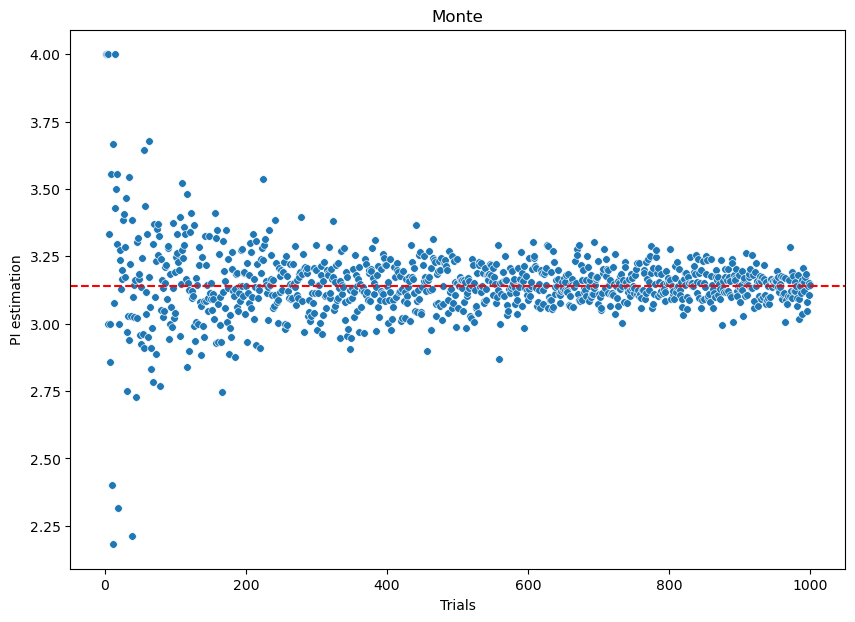

In [66]:
plt.figure(figsize=(10, 7))
# sns.scatterplot(x='Trials', y='PI', s=30,
#                       marker='o', data=pi_es_df[:])
plot = sns.scatterplot(x='Trials', y='PI', s=30,
                      marker='o', data=pi_es_df[:])
plot.set_title("Monte")
# plot.set_xlabel(u"ลูกดอก")
plot.set(xlabel='Trials', ylabel="PI estimation")
# pl

plt.axhline(y=math.pi, color='r', linestyle='--')

plt.show()
# plot.set()

In [97]:
avg = 1
std_dev = .1
num_reps = 500
# pct_to_target = np.r

In [110]:
pct_to_target = np.random.normal(avg, std_dev, num_reps).round(2)
# pct_to_target 

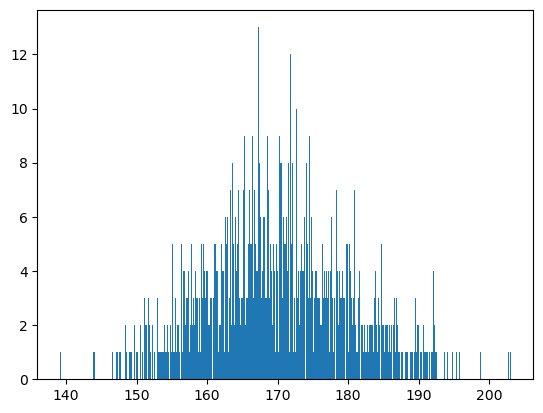

In [111]:
x = np.random.normal(170, 10, 1000).round(2)
# plt.hist(x)
# plt.plot(x)
plt.hist(x,bins=500)

plt.show()

In [112]:
sales_target_values = [75_000, 100_000, 200_000, 300_000, 400_000, 500_000]
sales_target_prob = [.3, .3, .2, .1, .05, .05]

sales_target = np.random.choice(sales_target_values, num_reps, p=sales_target_prob)

# sales_target

In [113]:
df = pd.DataFrame(index=range(num_reps),
                 data={'Pct_To_target': pct_to_target,
                      'Sales_Target': sales_target})
df.head()

,Pct_To_target,Sales_Target
0,1.06,500000
1,1.08,100000
2,1.08,75000
3,1.13,75000
4,0.93,300000


In [114]:
df['Sales'] = df.Pct_To_target * df.Sales_Target
df.head()

,Pct_To_target,Sales_Target,Sales
0,1.06,500000,530000.0
1,1.08,100000,108000.0
2,1.08,75000,81000.0
3,1.13,75000,84750.0
4,0.93,300000,279000.0


<AxesSubplot:title={'center':'Percent to Traget Distribution'}, ylabel='Frequency'>

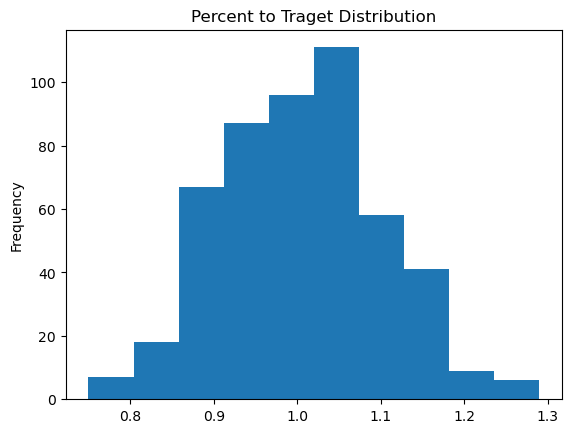

In [115]:
df.Pct_To_target.plot(kind='hist', title='Percent to Traget Distribution')

<AxesSubplot:xlabel='Sales_Target', ylabel='count'>

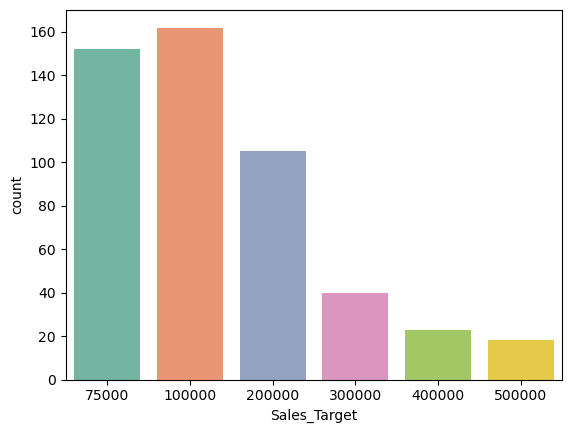

In [116]:
sns.countplot(x=df.Sales_Target, palette='Set2')

In [118]:
def calc_cms_rate(x):
    return .02 if x <= .9 else (
        .3 if x <= .99 else .04
    )

In [119]:
calc_cms_rate(.5)

0.02

In [120]:
calc_cms_rate(5)

0.04

In [121]:
df['Commission_Rate'] = df.Pct_To_target.apply(
    calc_cms_rate
)

In [122]:
df.head()

,Pct_To_target,Sales_Target,Sales,Commission_Rate
0,1.06,500000,530000.0,0.04
1,1.08,100000,108000.0,0.04
2,1.08,75000,81000.0,0.04
3,1.13,75000,84750.0,0.04
4,0.93,300000,279000.0,0.30


In [125]:
df['Commission_Amount'] = df['Commission_Rate'] * df['Sales']
df.head()

,Pct_To_target,Sales_Target,Sales,Commission_Rate,Commission_Amount
0,1.06,500000,530000.0,0.04,21200.0
1,1.08,100000,108000.0,0.04,4320.0
2,1.08,75000,81000.0,0.04,3240.0
3,1.13,75000,84750.0,0.04,3390.0
4,0.93,300000,279000.0,0.30,83700.0


In [131]:
num_simulations = 1000
all_stats = []
# Loop through many simulations
for i in range(num_simulations):
    # Choose random inputs for the sales targets and percent to target
    sales_target = np.random.choice(sales_target_values, num_reps, p=sales_target_prob)
    pct_to_target = np.random.normal(avg, std_dev, num_reps).round(2)
    # Build the dataframe based on the inputs and number of reps
    df = pd.DataFrame(index=range(num_reps), data={'Pct_To_Target': pct_to_target,
                                                   'Sales_Target': sales_target})

    # Back into the sales number using the percent to target rate
    df['Sales'] = df['Pct_To_Target'] * df['Sales_Target']
    # Determine the commissions rate and calculate it
    df['Commission_Rate'] = df['Pct_To_Target'].apply(calc_cms_rate)
    df['Commission_Amount'] = df['Commission_Rate'] * df['Sales']
    # We want to track sales,commission amounts and sales targets over all the simulations
    all_stats.append([df['Sales'].sum().round(0),

  df['Commission_Amount'].sum().round(0),
  df['Sales_Target'].sum().round(0)])

all_stats[:5]

[[87299000.0, 10573890.0, 87600000],
 [84747500.0, 9006415.0, 85075000],
 [83801250.0, 9324970.0, 82875000],
 [82684000.0, 9166250.0, 83475000],
 [84639250.0, 10657355.0, 84725000]]

In [132]:
results_d = pd.DataFrame.from_records(all_stats, columns=[
    'Sales', 'Commission_Amount', 'Sales_Target'
])

In [133]:
results_d

,Sales,Commission_Amount,Sales_Target
0,87299000.0,10573890.0,87600000
1,84747500.0,9006415.0,85075000
2,83801250.0,9324970.0,82875000
3,82684000.0,9166250.0,83475000
4,84639250.0,10657355.0,84725000
...,...,...,...
995,86183250.0,10466380.0,85650000
996,84132500.0,10609610.0,84525000
997,83361000.0,9246355.0,83625000
998,80236500.0,9058340.0,80950000


<AxesSubplot:ylabel='Frequency'>

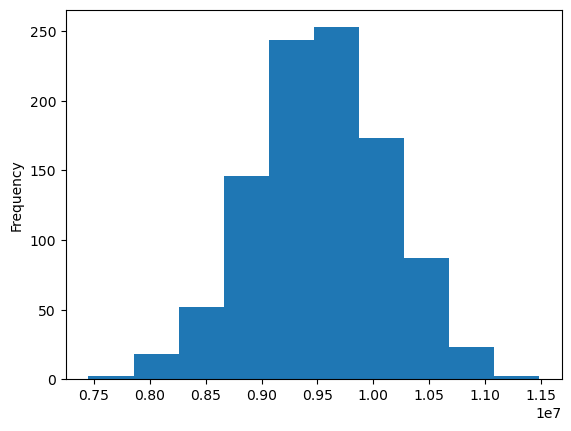

In [134]:
results_d.Commission_Amount.plot(kind='hist')